In [1]:
#install.packages("ggthemes")
#install.packages("lubridate")
#install.packages("scales")
#install.packages("DT")
#install.packages("IRdisplay")

In [2]:
# Dataset Link :
#https://www.kaggle.com/datasets/fivethirtyeight/uber-pickups-in-new-york-city

In [3]:
#Data Analysis using uber Dataset

#import important library
library(ggplot2) #visualization matplotlib in case of python
library(ggthemes) #add-on with ggplot
library(dplyr) #data manipulation
library(lubridate) #date time
library(scales) #graphical scaling
library(tidyr) #tidy data
library(DT) #tables formatted result

suppressWarnings(expr)

Warning message:
"package 'ggplot2' was built under R version 4.2.1"
Warning message:
"package 'ggthemes' was built under R version 4.2.1"
Warning message:
"package 'dplyr' was built under R version 4.2.1"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'lubridate' was built under R version 4.2.1"

Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Warning message:
"package 'scales' was built under R version 4.2.1"
Warning message:
"package 'tidyr' was built under R version 4.2.1"
Warning message:
"package 'DT' was built under R version 4.2.1"


function (expr) 
{
    enexpr(expr)
}
<bytecode: 0x000001ff472cdf18>
<environment: namespace:rlang>

In [4]:
#read the data
apr_data <- read.csv("uber-raw-data-apr14.csv")
may_data <- read.csv("uber-raw-data-may14.csv")
jun_data <- read.csv("uber-raw-data-jun14.csv")
jul_data <- read.csv("uber-raw-data-jul14.csv")
aug_data <- read.csv("uber-raw-data-aug14.csv")
sep_data <- read.csv("uber-raw-data-sep14.csv")

# all have same header , 6 months data

In [5]:
#combining all the data
data_2014 <- rbind(apr_data,may_data,jun_data,jul_data,aug_data,sep_data)

In [6]:
#Visualize the data
head(data_2014)

,Date.Time,Lat,Lon,Base
,<chr>,<dbl>,<dbl>,<chr>
1,4/1/2014 0:11:00,40.7690,-73.9549,B02512
2,4/1/2014 0:17:00,40.7267,-74.0345,B02512
3,4/1/2014 0:21:00,40.7316,-73.9873,B02512
4,4/1/2014 0:28:00,40.7588,-73.9776,B02512
5,4/1/2014 0:33:00,40.7594,-73.9722,B02512
6,4/1/2014 0:33:00,40.7383,-74.0403,B02512


In [7]:
#Structure
str(data_2014)

'data.frame':	4534327 obs. of  4 variables:
 $ Date.Time: chr  "4/1/2014 0:11:00" "4/1/2014 0:17:00" "4/1/2014 0:21:00" "4/1/2014 0:28:00" ...
 $ Lat      : num  40.8 40.7 40.7 40.8 40.8 ...
 $ Lon      : num  -74 -74 -74 -74 -74 ...
 $ Base     : chr  "B02512" "B02512" "B02512" "B02512" ...


In [8]:
#summary statistics
summary(data_2014)

  Date.Time              Lat             Lon             Base          
 Length:4534327     Min.   :39.66   Min.   :-74.93   Length:4534327    
 Class :character   1st Qu.:40.72   1st Qu.:-74.00   Class :character  
 Mode  :character   Median :40.74   Median :-73.98   Mode  :character  
                    Mean   :40.74   Mean   :-73.97                     
                    3rd Qu.:40.76   3rd Qu.:-73.97                     
                    Max.   :42.12   Max.   :-72.07                     

In [9]:
# From Date time we get time frame
# Lat lon gives the data location
#Here 5 base there.

# Analysis start

data_2014$Date.Time <- as.POSIXct(data_2014$Date.Time, format = "%m/%d/%Y %H:%M:%S")

In [10]:
#Exctracting time from date time
data_2014$Time <- format(as.POSIXct(data_2014$Date.Time, format = "%m/%d/%Y %H:%M:%S"), format = "%H:%M:%S")


In [11]:
#confirm
data_2014$Date.Time <- ymd_hms(data_2014$Date.Time) #Formatting
data_2014$day <- format(day(data_2014$Date.Time)) #day
data_2014$month <- format(month(data_2014$Date.Time, label=TRUE))
data_2014$year <- format(year(data_2014$Date.Time)) # no meaning as we have date of 2014 only
data_2014$dayofweek <- format(wday(data_2014$Date.Time, label=TRUE)) #dayofweek


In [12]:
#hour minutes seconds

data_2014$hour <- factor(hour(hms(data_2014$Time))) #we want all of these as factor
data_2014$minute <- factor(minute(hms(data_2014$Time)))
data_2014$second <- factor(second(hms(data_2014$Time)))

In [13]:
#Full data
head(data_2014)

,Date.Time,Lat,Lon,Base,Time,day,month,year,dayofweek,hour,minute,second
,<dttm>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>
1,2014-04-01 00:11:00,40.7690,-73.9549,B02512,00:11:00,1,Apr,2014,Tue,0,11,0
2,2014-04-01 00:17:00,40.7267,-74.0345,B02512,00:17:00,1,Apr,2014,Tue,0,17,0
3,2014-04-01 00:21:00,40.7316,-73.9873,B02512,00:21:00,1,Apr,2014,Tue,0,21,0
4,2014-04-01 00:28:00,40.7588,-73.9776,B02512,00:28:00,1,Apr,2014,Tue,0,28,0
5,2014-04-01 00:33:00,40.7594,-73.9722,B02512,00:33:00,1,Apr,2014,Tue,0,33,0
6,2014-04-01 00:33:00,40.7383,-74.0403,B02512,00:33:00,1,Apr,2014,Tue,0,33,0


In [14]:
#let's start visualization

#plotting the trip by hours in a day

hour_data <- data_2014 %>%
group_by(hour) %>%
summarise(Total = n()) #grouping the data wrt hour count

#see in a tabular form
datatable(hour_data)

HTML widgets cannot be represented in plain text (need html)

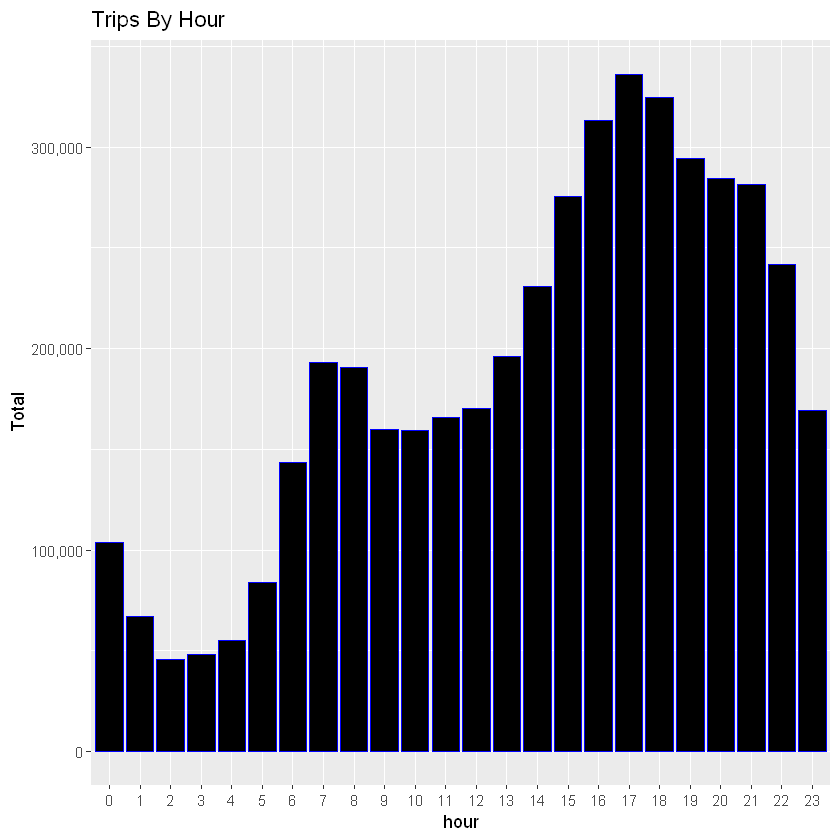

In [15]:
#visualize the data
ggplot(hour_data, aes(hour,Total)) + 
    geom_bar(stat = "identity", fill = "black", color = "blue") + 
    ggtitle("Trips By Hour") + 
    theme(legend.position = "none") +
    scale_y_continuous(labels = comma)

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


HTML widgets cannot be represented in plain text (need html)

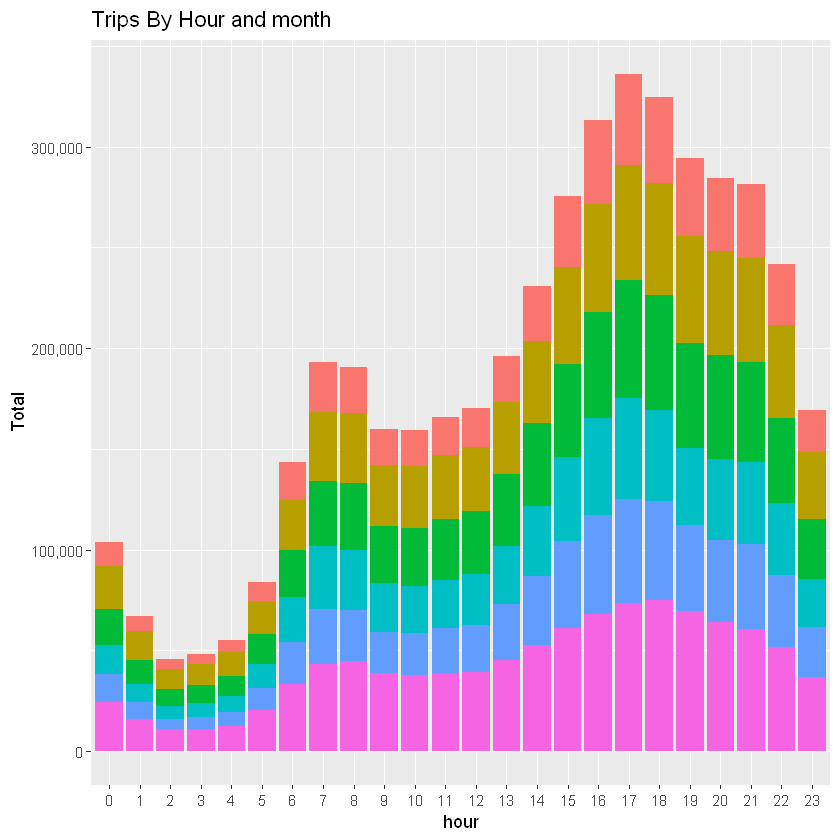

In [16]:
#most operations happens during 15 to 21 hour aka 3 pm to 9 pm 
month_hour_data <- data_2014 %>%
group_by(month, hour) %>%
summarise(Total = n())

#see in a tabular form
datatable(month_hour_data)

#plot the same
ggplot(month_hour_data, aes(hour,Total, fill=month)) + 
    geom_bar(stat = "identity") + 
    ggtitle("Trips By Hour and month") + 
    theme(legend.position = "none") +
    scale_y_continuous(labels = comma)

`summarise()` has grouped output by 'hour'. You can override using the
`.groups` argument.


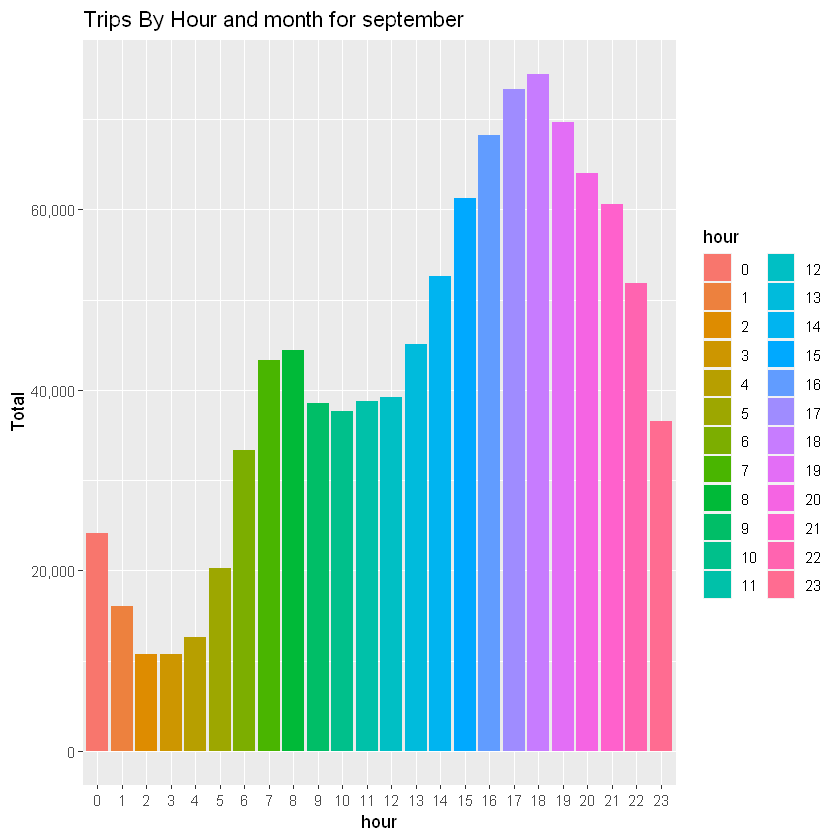

In [17]:
#finding from graph september has more rides than ever

sept_hour <- data_2014 %>%
    group_by(hour,month) %>%
    filter(month == "Sep") %>%
    summarise(Total = n())

ggplot(sept_hour, aes(hour,Total,fill=hour)) +
   geom_bar(stat = "identity") + 
   ggtitle("Trips By Hour and month for september") +

   scale_y_continuous(labels = comma)

`summarise()` has grouped output by 'hour'. You can override using the
`.groups` argument.


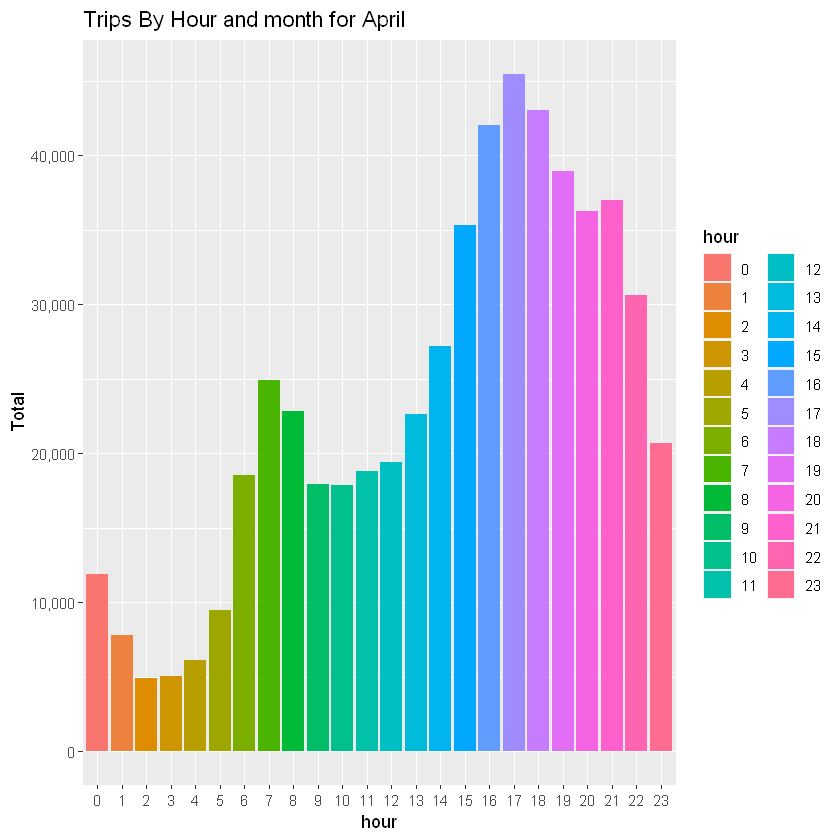

In [18]:
#around 6 pm 2000000 rides the most do the same for april

apr_hour <- data_2014 %>%
    group_by(hour,month) %>%
    filter(month == "Apr") %>%
    summarise(Total = n())

ggplot(apr_hour, aes(hour,Total,fill=hour)) +
   geom_bar(stat = "identity") + 
   ggtitle("Trips By Hour and month for April") +

   scale_y_continuous(labels = comma)

#around 50000 rides on 5 pm in April

In [19]:
#Plot the data grouped by day

day_data <- data_2014 %>%
group_by(day) %>%
summarise(Total = n()) #grouping the data wrt hour count

#see in a tabular form
datatable(day_data)

HTML widgets cannot be represented in plain text (need html)

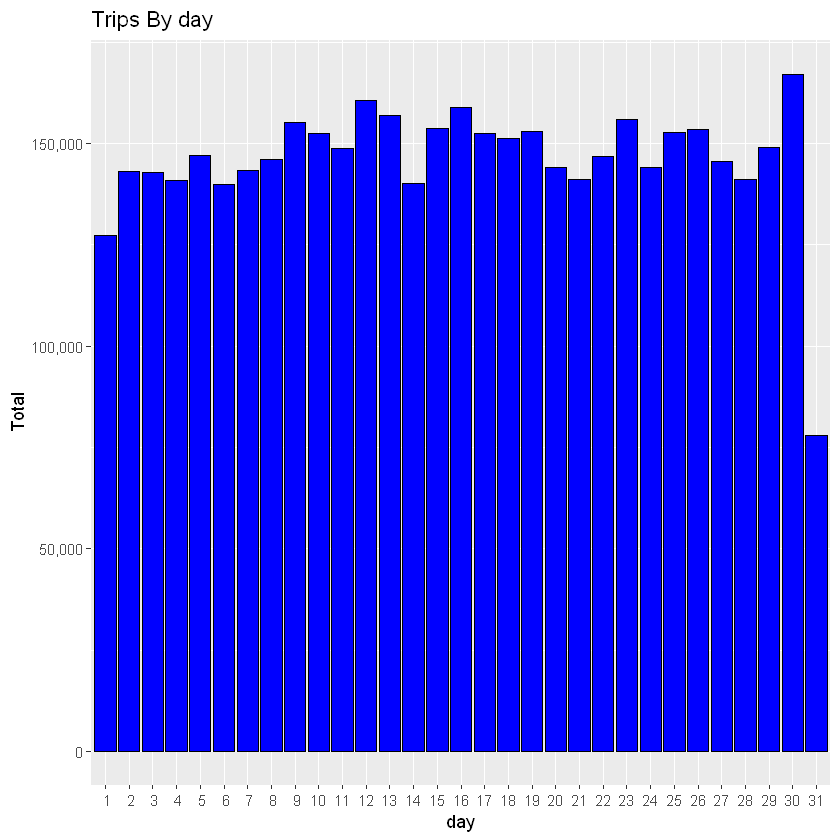

In [20]:
# Visualization

ggplot(day_data, aes(day,Total)) + 
    geom_bar(stat = "identity", fill = "blue", color = "black") + 
    ggtitle("Trips By day") + 
    theme(legend.position = "none") +
    scale_y_continuous(labels = comma)

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


HTML widgets cannot be represented in plain text (need html)

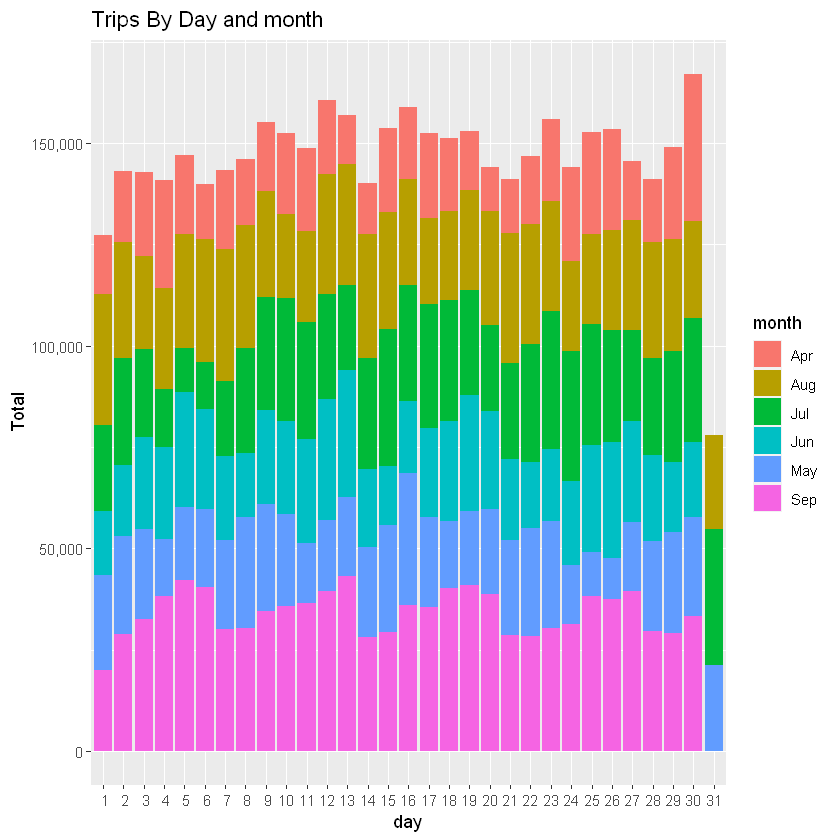

In [21]:
#more or less uniform distribution rather than 31 because many month have 31

# do a month and day grouping

month_day_data <- data_2014 %>%
group_by(month, day) %>%
summarise(Total = n())

#see in a tabular form
datatable(month_day_data)

#plot the same
ggplot(month_day_data, aes(day,Total, fill=month)) + 
    geom_bar(stat = "identity") + 
    ggtitle("Trips By Day and month") + 
    
    scale_y_continuous(labels = comma)


`summarise()` has grouped output by 'day'. You can override using the `.groups`
argument.


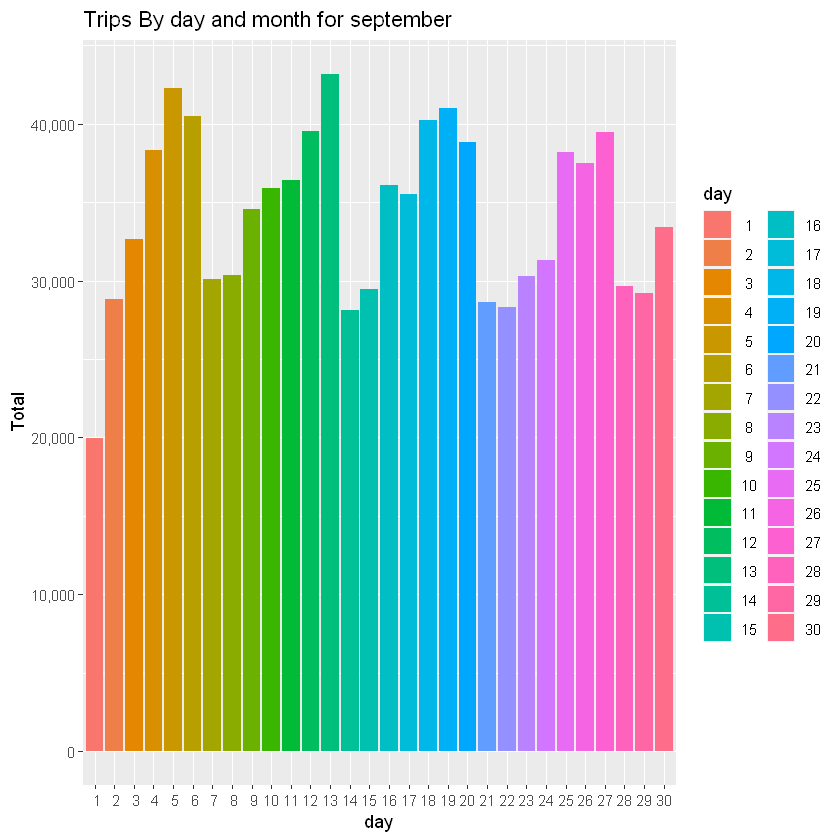

In [22]:
# finding data worth of 183 days

#sept data

sept_day <- data_2014 %>%
    group_by(day,month) %>%
    filter(month == "Sep") %>%
    summarise(Total = n())

ggplot(sept_day, aes(day,Total,fill=day)) +
   geom_bar(stat = "identity") + 
   ggtitle("Trips By day and month for september") +

   scale_y_continuous(labels = comma)

#13 has highest number of rides

In [23]:
#monthly trend
month_data <- data_2014 %>% group_by(month) %>% summarise(Total = n())
datatable(month_data)

HTML widgets cannot be represented in plain text (need html)

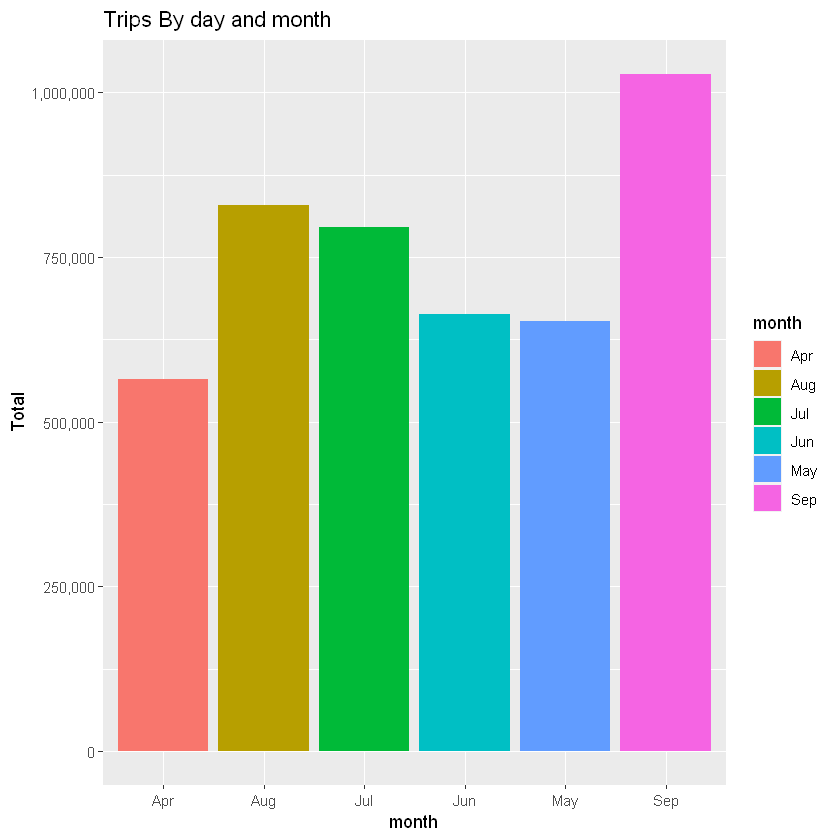

In [24]:
#aug and sept has the highest kind of rides

ggplot(month_data, aes(month, Total, fill=month)) + 
geom_bar(stat = "identity") +
ggtitle("Trips By day and month") + 

scale_y_continuous(labels = comma)

#no particular trend spotted

In [25]:
#month- weekday
month_weekday_data <- data_2014 %>% group_by(month,dayofweek) %>% summarise(Total = n())
datatable(month_weekday_data)

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


HTML widgets cannot be represented in plain text (need html)

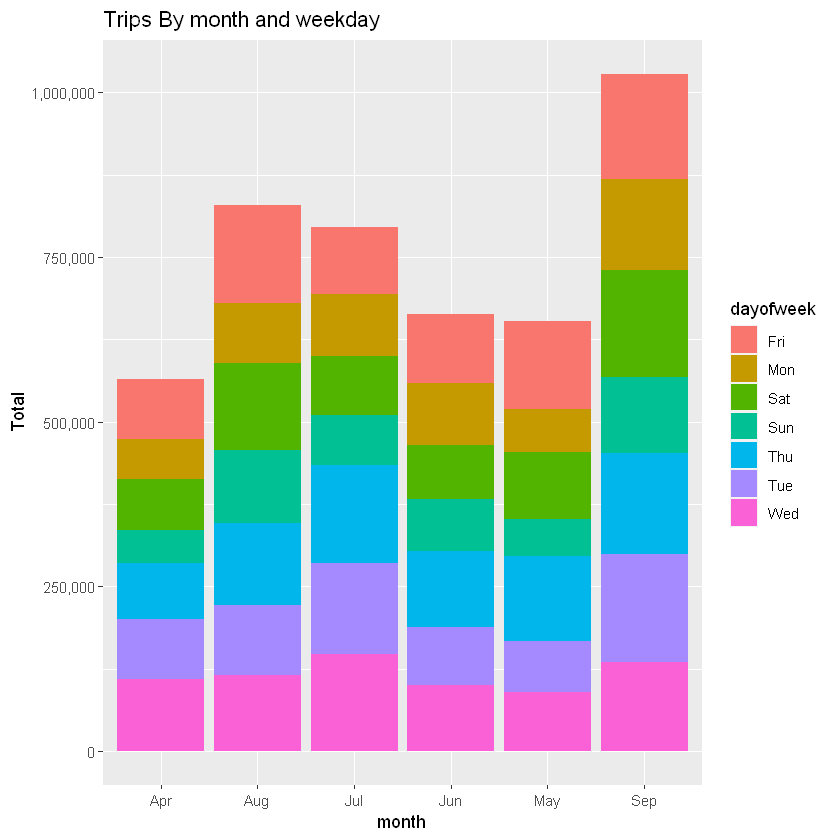

In [26]:
ggplot(month_weekday_data, aes(month, Total, fill=dayofweek)) + 
geom_bar(stat = "identity") +
ggtitle("Trips By month and weekday") + 

scale_y_continuous(labels = comma)

HTML widgets cannot be represented in plain text (need html)

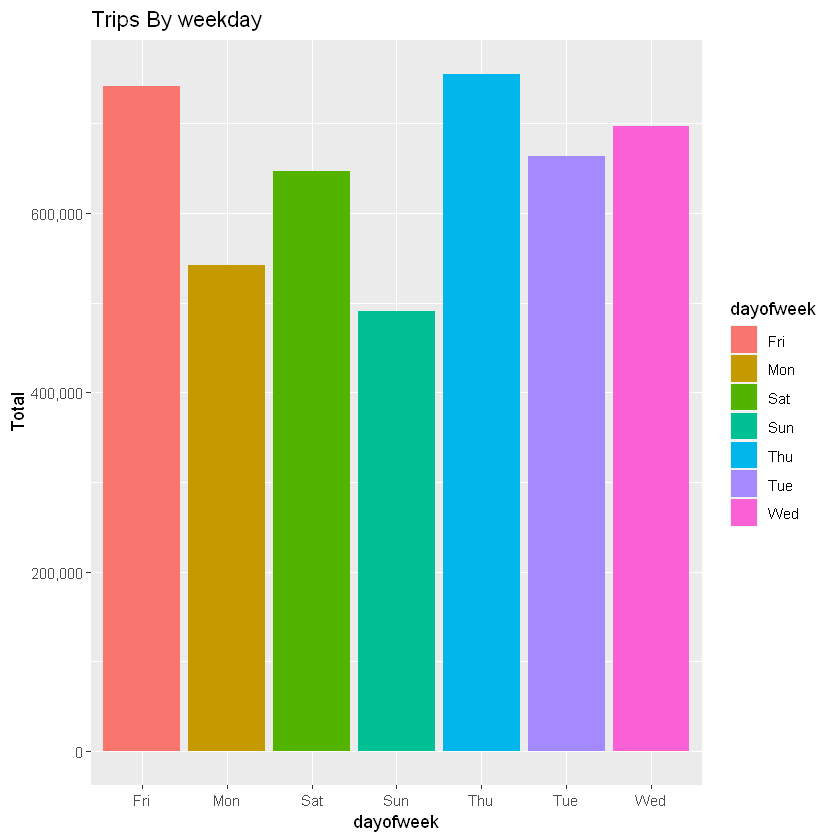

In [27]:
#only for weekday
weekday_data <- data_2014 %>% group_by(dayofweek) %>% summarise(Total = n())
datatable(weekday_data)

ggplot(weekday_data, aes(dayofweek, Total, fill=dayofweek)) + 
geom_bar(stat = "identity") +
ggtitle("Trips By weekday") + 

scale_y_continuous(labels = comma)

#thursday day and friday has more traffic

$title
[1] "Trips by Bases"

attr(,"class")
[1] "labels"

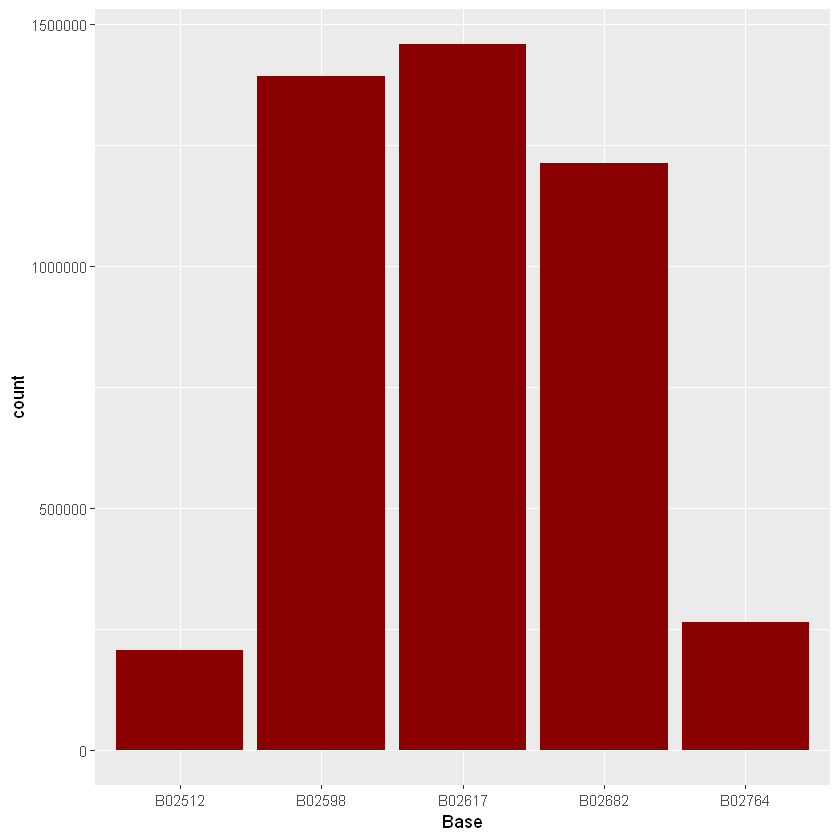

In [28]:
#analysis of bases

ggplot(data_2014, aes(Base)) +
geom_bar(fill = "darkred")
#scale_y_continuous(labels = comma) +
ggtitle("Trips by Bases")

#it seems BO2512 & BO2764 is not much profitable

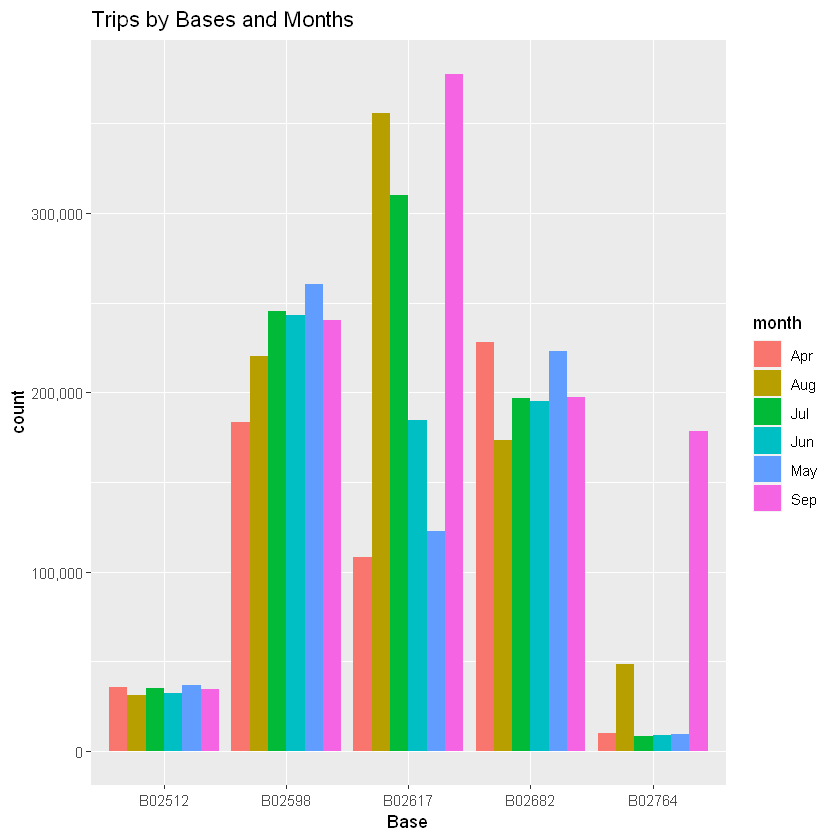

In [29]:
#trip based on bases and montes
ggplot(data_2014, aes(Base, fill = month)) + 
geom_bar(position = "dodge") +
scale_y_continuous(labels = comma) +
ggtitle("Trips by Bases and Months") 

#events in sept in BO2764 and even in apr and may in BO2617 must be observed.


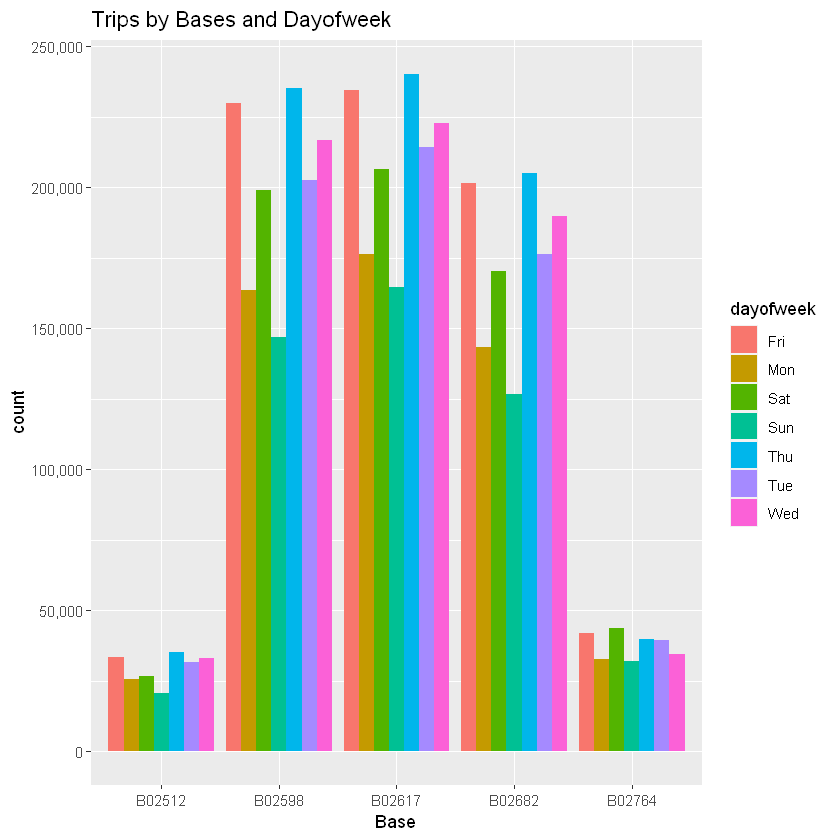

In [30]:
#same with days of week
ggplot(data_2014, aes(Base, fill = dayofweek)) +
geom_bar(position = "dodge") +
scale_y_continuous(labels = comma) +
ggtitle("Trips by Bases and Dayofweek")

#nothing suspi...

`summarise()` has grouped output by 'day'. You can override using the `.groups`
argument.


HTML widgets cannot be represented in plain text (need html)

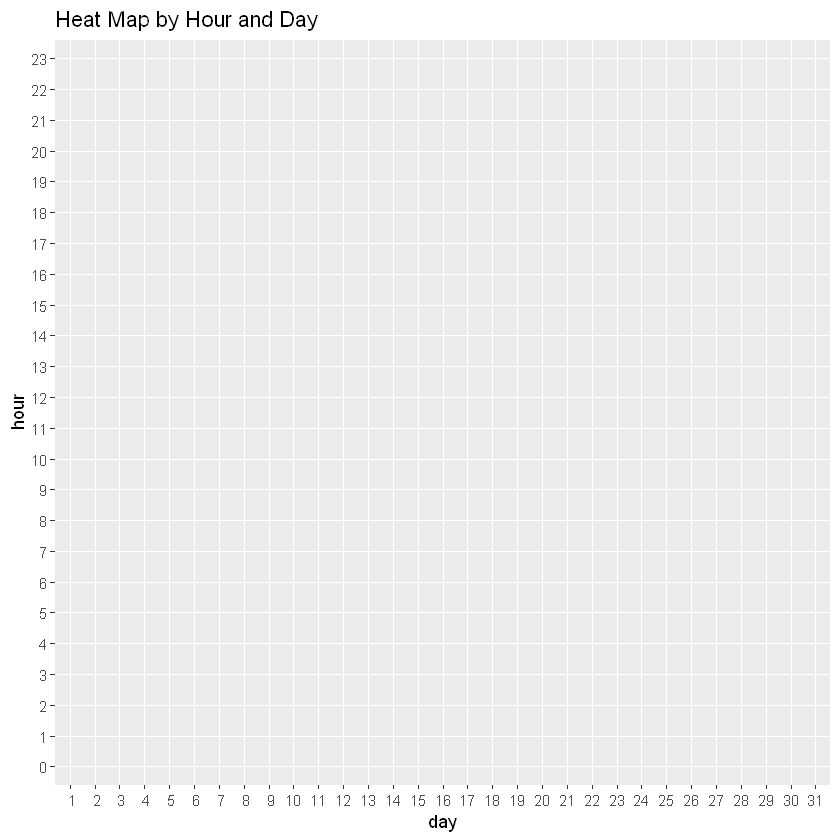

In [31]:
#day and hour
day_and_hour <- data_2014 %>%
group_by(day, hour) %>%
dplyr::summarize(Total = n())
datatable(day_and_hour)

ggplot(day_and_hour, aes(day, hour, fill = Total)) +
#geom_title(color = "white") +
ggtitle("Heat Map by Hour and Day")

#as seen from previous barchart 15 to 21 most profitable hours

#lets plot a geo fistribution

min_lat <- 40.5774
max_lat <- 40.9176
min_long <- -74.15
max_long <- -73.7004 #from summary stat

ggplot(data_2014, aes(x=Lon, y=Lat, color = Base)) + 
geom_point(size=1) +
scale_x_continuous(limits=c(min_long, max_long)) +
scale_y_continuous(limits=c(min_lat, max_lat)) +
theme_map() +
ggtitle("NYC(lat-long) MAP Based on Uber Rides during 2014 (Apr-Sept) by Base")



Warning message:
"Removed 71701 rows containing missing values (geom_point)."


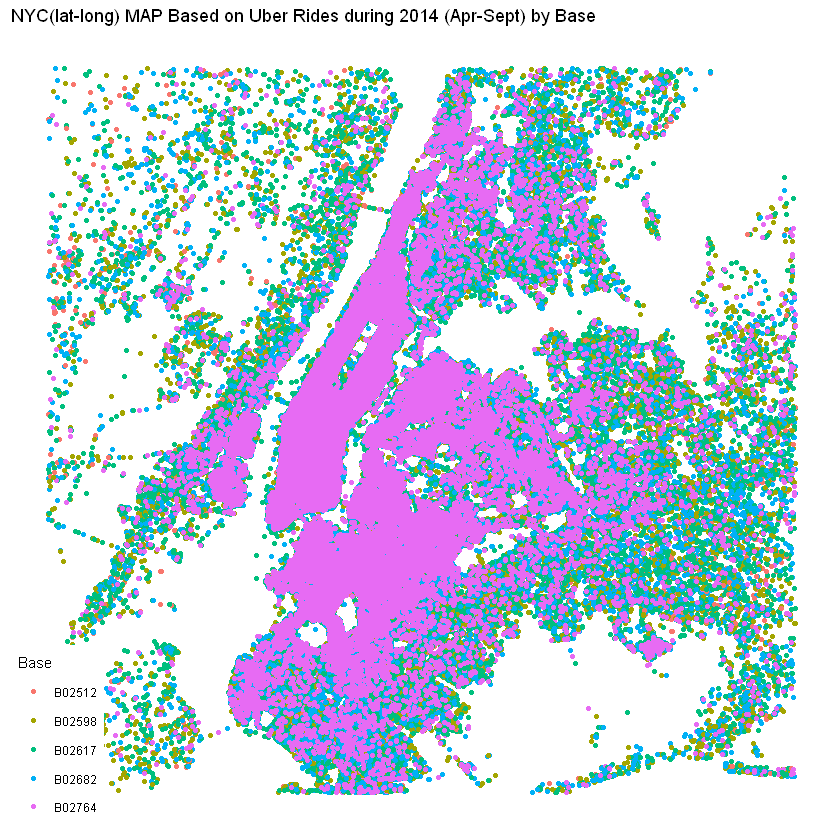

In [32]:
#lets plot a geo fistribution

min_lat <- 40.5774
max_lat <- 40.9176
min_long <- -74.15
max_long <- -73.7004 #from summary stat

ggplot(data_2014, aes(x=Lon, y=Lat, color = Base)) + 
geom_point(size=1) +
scale_x_continuous(limits=c(min_long, max_long)) +
scale_y_continuous(limits=c(min_lat, max_lat)) +
theme_map() +
ggtitle("NYC(lat-long) MAP Based on Uber Rides during 2014 (Apr-Sept) by Base")
